In [15]:
import pandas as pd

salary_df = pd.read_excel('/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx')
salary_df.head()


,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [16]:
salary_df.describe()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,EXPERIENCE_REQUIRED_NUM_MONTHS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,order
count,1.672780e+05,1.672780e+05,4965.000000,167210.000000,1.672780e+05,167278.000000
mean,7.115752e+04,8.164186e+04,34.692044,74274.868236,8.553277e+04,83714.716305
std,3.874624e+04,4.147703e+04,22.317783,25356.245893,3.873847e+04,48300.236431
min,5.050000e+00,5.050000e+00,0.000000,10504.000000,1.050000e+04,1.000000
25%,5.447500e+04,6.100000e+04,12.000000,56880.000000,6.300000e+04,41901.250000
50%,6.970100e+04,7.700000e+04,24.000000,70928.000000,7.860000e+04,83722.500000
75%,8.993700e+04,1.000000e+05,60.000000,90459.000000,1.000060e+05,125541.750000
max,6.217100e+06,2.500000e+06,144.000000,320000.000000,2.500000e+06,167361.000000


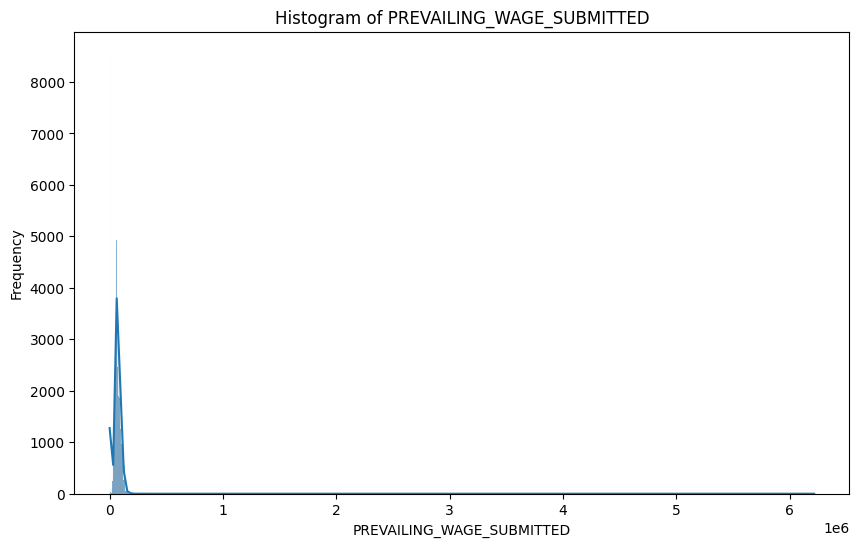

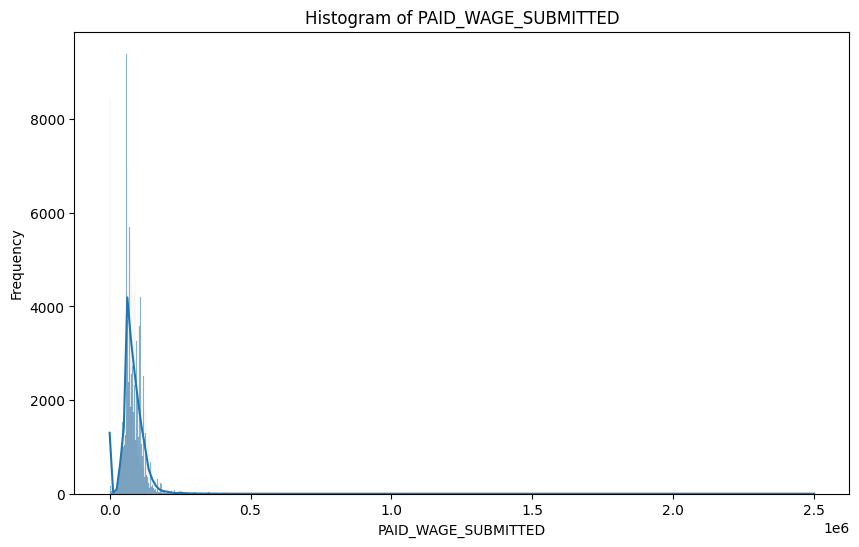

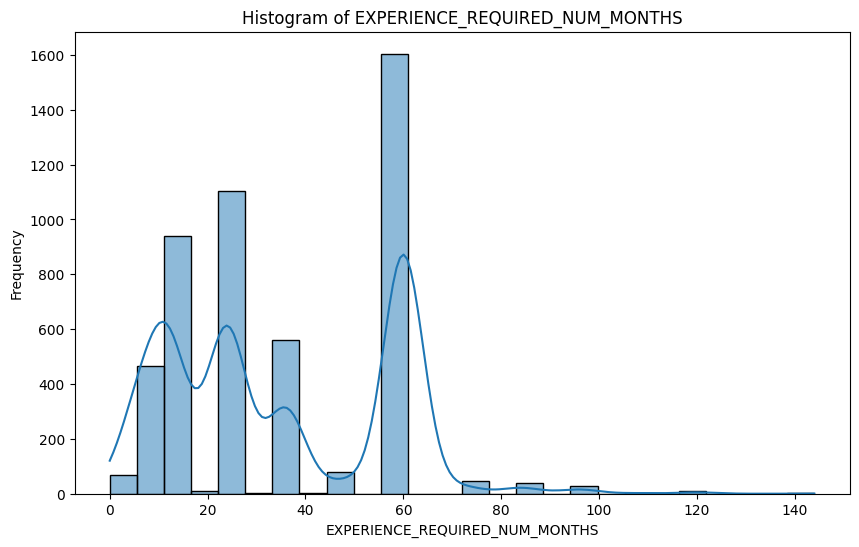

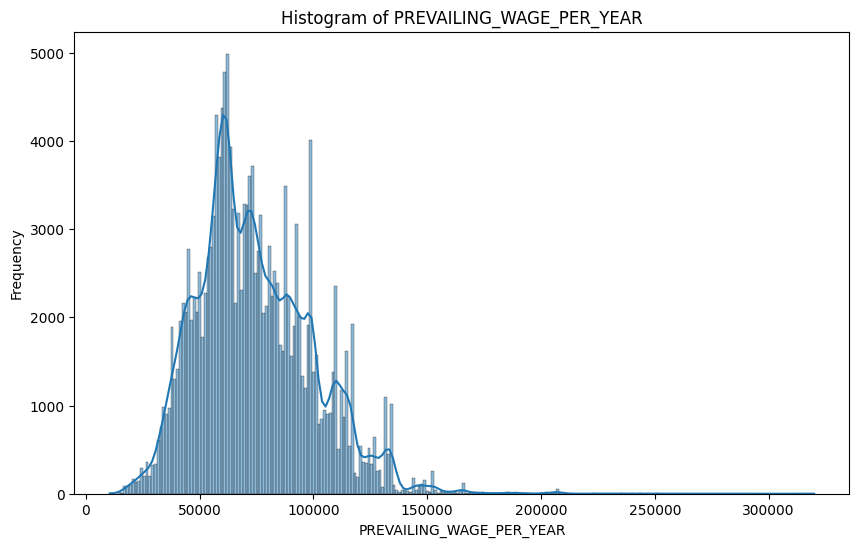

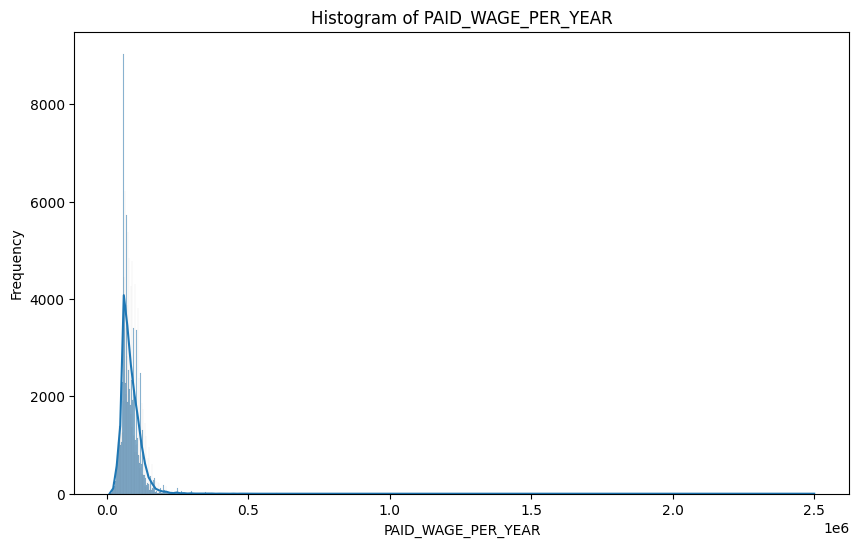

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns for which we want to plot histograms
columns = ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 
           'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR']

# Loop through each column and create a histogram
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=salary_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

             

In [22]:
import pandas as pd

file_path = '/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx'
columns_to_load = [
    'EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'WORK_STATE'
]
salary_df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=columns_to_load)

data_jobs = salary_df[salary_df['JOB_TITLE_SUBGROUP'].str.contains('Data|Analyst|Engineer', case=False, na=False)]

avg_salaries_by_subtype = data_jobs.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)
print("Average Salaries for Data-Related Job Subtypes:")
print(avg_salaries_by_subtype)

highest_paying_companies = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'EMPLOYER_NAME'])['PAID_WAGE_PER_YEAR'].mean()

highest_paying_companies = highest_paying_companies.groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
print("\nTop Companies with Highest Salaries for Each Data Job Subtype:")
print(highest_paying_companies)

salary_by_location = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean()

salary_by_location = salary_by_location.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
print("\nAverage Salaries by Job Subtype and Location:")
print(salary_by_location)


Average Salaries for Data-Related Job Subtypes:
JOB_TITLE_SUBGROUP
data scientist       108021.038248
software engineer     92505.303013
business analyst      71300.079566
data analyst          70030.078688
Name: PAID_WAGE_PER_YEAR, dtype: float64

Top Companies with Highest Salaries for Each Data Job Subtype:
JOB_TITLE_SUBGROUP  EMPLOYER_NAME                                
business analyst    THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION    677508.000000
                    OFFICEMAX INCORPORATED                           603711.730000
                    ASCENDUM SOLUTIONS, LLC                          264992.000000
                    ELIE TAHARI LTD.                                 220000.000000
                    HARA-TECH, INC.                                  184683.000000
data analyst        INTUIT                                           433161.500000
                    KNOWLEDGENT GROUP INC.                           185000.000000
                    NETFLIX, INC.        

In [24]:
import pandas as pd

file_path = '/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx'
columns_to_load = [
    'EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'WORK_STATE'
]
salary_df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=columns_to_load)

data_jobs = salary_df[salary_df['JOB_TITLE_SUBGROUP'].str.contains('Data|Analyst|Engineer', case=False, na=False)]

# Part I: Do specific sub-types of data-related jobs have higher or lower salaries than others?
avg_salaries_by_subtype = data_jobs.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)
print("Average Salaries for Data-Related Job Subtypes:")
print(avg_salaries_by_subtype)

# Part 1a: Which companies have the highest salaries for those subtypes?
highest_paying_companies = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'EMPLOYER_NAME'])['PAID_WAGE_PER_YEAR'].mean()

highest_paying_companies = highest_paying_companies.groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
print("\nTop Companies with Highest Salaries for Each Data Job Subtype:")
print(highest_paying_companies)

# Part 1b: How does the location of the job affect salaries?
salary_by_location = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean()
salary_by_location = salary_by_location.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
print("\nAverage Salaries by Job Subtype and Location:")
print(salary_by_location)


Average Salaries for Data-Related Job Subtypes:
JOB_TITLE_SUBGROUP
data scientist       108021.038248
software engineer     92505.303013
business analyst      71300.079566
data analyst          70030.078688
Name: PAID_WAGE_PER_YEAR, dtype: float64

Top Companies with Highest Salaries for Each Data Job Subtype:
JOB_TITLE_SUBGROUP  EMPLOYER_NAME                                
business analyst    THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION    677508.000000
                    OFFICEMAX INCORPORATED                           603711.730000
                    ASCENDUM SOLUTIONS, LLC                          264992.000000
                    ELIE TAHARI LTD.                                 220000.000000
                    HARA-TECH, INC.                                  184683.000000
data analyst        INTUIT                                           433161.500000
                    KNOWLEDGENT GROUP INC.                           185000.000000
                    NETFLIX, INC.        

In [8]:
import pandas as pd

file_path = '/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx'
columns_to_load = [
    'EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'WORK_STATE'
]
salary_df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=columns_to_load)
desired_states = ['California', 'New York', 'Texas']  # Replace with your actual list of states

data_jobs = salary_df[
    salary_df['JOB_TITLE_SUBGROUP'].str.contains('Data|Analyst|Engineer', case=False, na=False) &
    salary_df['WORK_STATE'].isin(desired_states)
]

# II. What states (of those I am willing to move to) have the highest paying data-related salaries?

avg_salaries_by_state_subtype = data_jobs.groupby(['WORK_STATE', 'JOB_TITLE_SUBGROUP'])['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)
print("Average Salaries by State and Job Subcategory:")
print(avg_salaries_by_state_subtype)

# 2a - Differences between job subcategories
print("\nDifferences in Salaries Between Job Subcategories by State:")
print(avg_salaries_by_state_subtype.unstack(level=1))

# 2b - Which companies have the highest salaries of those sub-types?

highest_paying_companies_in_states = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'EMPLOYER_NAME', 'WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean()

highest_paying_companies_in_states = highest_paying_companies_in_states.groupby(level=[0, 2]).nlargest(5).reset_index(level=[0, 2], drop=True)
print("\nTop Companies with Highest Salaries for Each Data Job Subtype by State:")
print(highest_paying_companies_in_states)


# 2c - Will the answer change if I take the standard of living into account ?
# Cost of Living Index (COLI) data
coli_data = pd.DataFrame({
    'WORK_STATE': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 
                   'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 
                   'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
                   'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 
                   'WV', 'WI', 'WY'],
    'COL_INDEX': [88.8, 124.4, 107.2, 90.3, 134.5, 105.5, 113.1, 102.6, 148.7, 102.3, 
                  91, 179, 106.1, 90.8, 91.5, 89.7, 87.7, 93.8, 92, 111.5, 119.5, 
                  148.4, 92.7, 94.1, 85.3, 88.4, 103.7, 90.1, 101.3, 115, 114.1, 
                  94.2, 125.1, 96.1, 94.6, 94, 86, 115.1, 99, 110.5, 96.5, 93.8, 
                  90.4, 93, 101.5, 114.9, 103.1, 115.1, 90.3, 95, 92.8]
})
# Merge COLI data into the salary dataset
data_jobs_with_coli = data_jobs.merge(coli_data, on='WORK_STATE', how='left')

# Adjust salaries based on COLI
data_jobs_with_coli['ADJUSTED_SALARY'] = data_jobs_with_coli['PAID_WAGE_PER_YEAR'] / (data_jobs_with_coli['COL_INDEX'] / 100)

# Recalculate average adjusted salaries by state and job subcategory
avg_adj_salaries_by_state_subtype = data_jobs_with_coli.groupby(['WORK_STATE', 'JOB_TITLE_SUBGROUP'])['ADJUSTED_SALARY'].mean().sort_values(ascending=False)

print("\nAverage Adjusted Salaries by State and Job Subcategory (Considering COLI):")
print(avg_adj_salaries_by_state_subtype)

# Comparison: Original vs Adjusted Salaries
comparison = pd.concat(
    [avg_salaries_by_state_subtype, avg_adj_salaries_by_state_subtype],
    axis=1,
    keys=['Original Salary', 'Adjusted Salary']
)

print("\nComparison of Original vs Adjusted Salaries by State and Job Subcategory:")
print(comparison)


Average Salaries by State and Job Subcategory:
WORK_STATE  JOB_TITLE_SUBGROUP
California  data scientist        117824.161492
            software engineer     108558.511357
New York    data scientist        106332.276119
            software engineer      99155.750278
Texas       data scientist         89126.902439
California  data analyst           80470.054621
New York    business analyst       77573.839422
Texas       software engineer      77547.563224
California  business analyst       76568.124680
New York    data analyst           71448.997913
Texas       business analyst       70112.082753
            data analyst           65065.328501
Name: PAID_WAGE_PER_YEAR, dtype: float64

Differences in Salaries Between Job Subcategories by State:
JOB_TITLE_SUBGROUP  business analyst  data analyst  data scientist  \
WORK_STATE                                                           
California              76568.124680  80470.054621   117824.161492   
New York                77573.8394

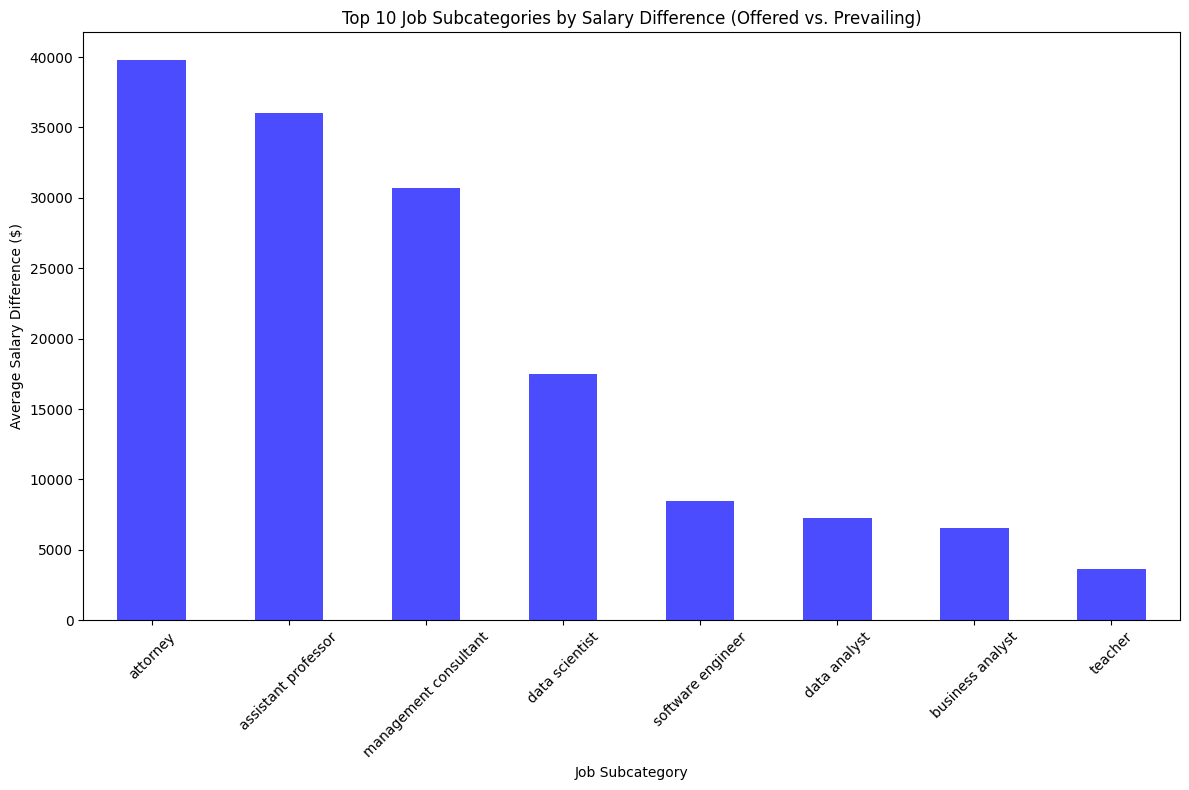

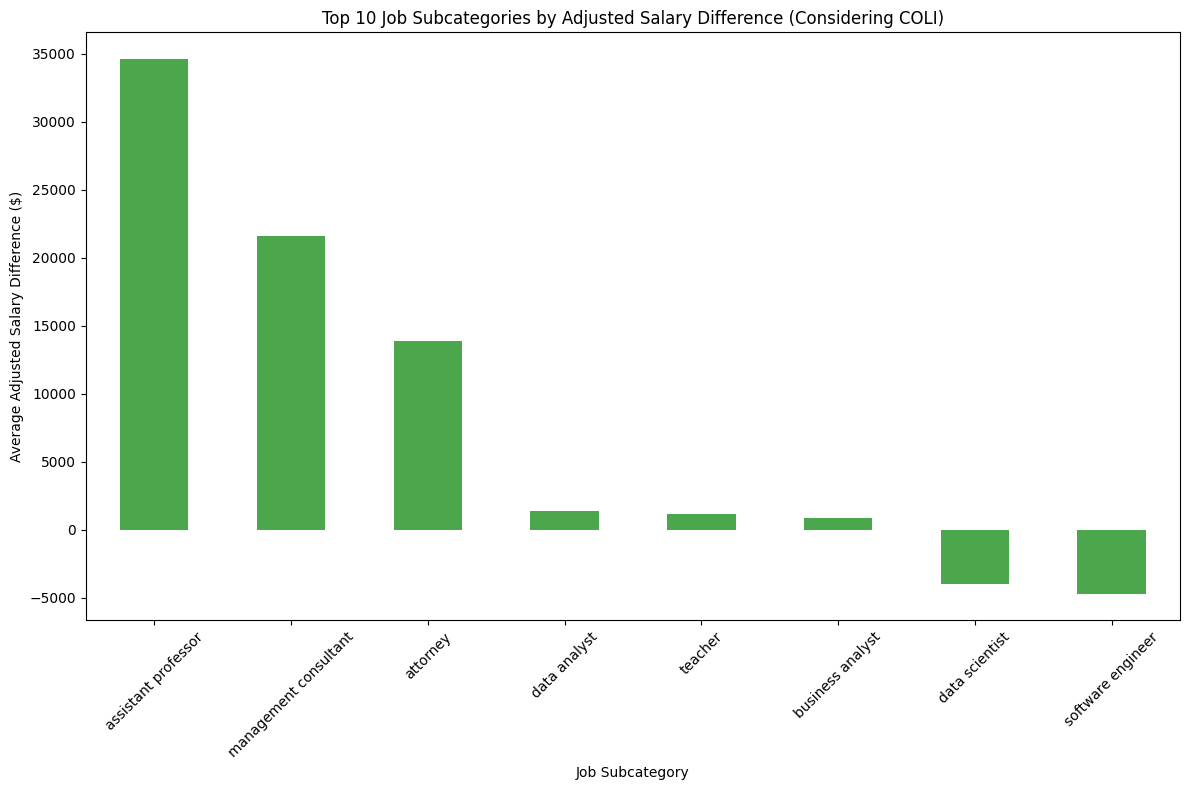

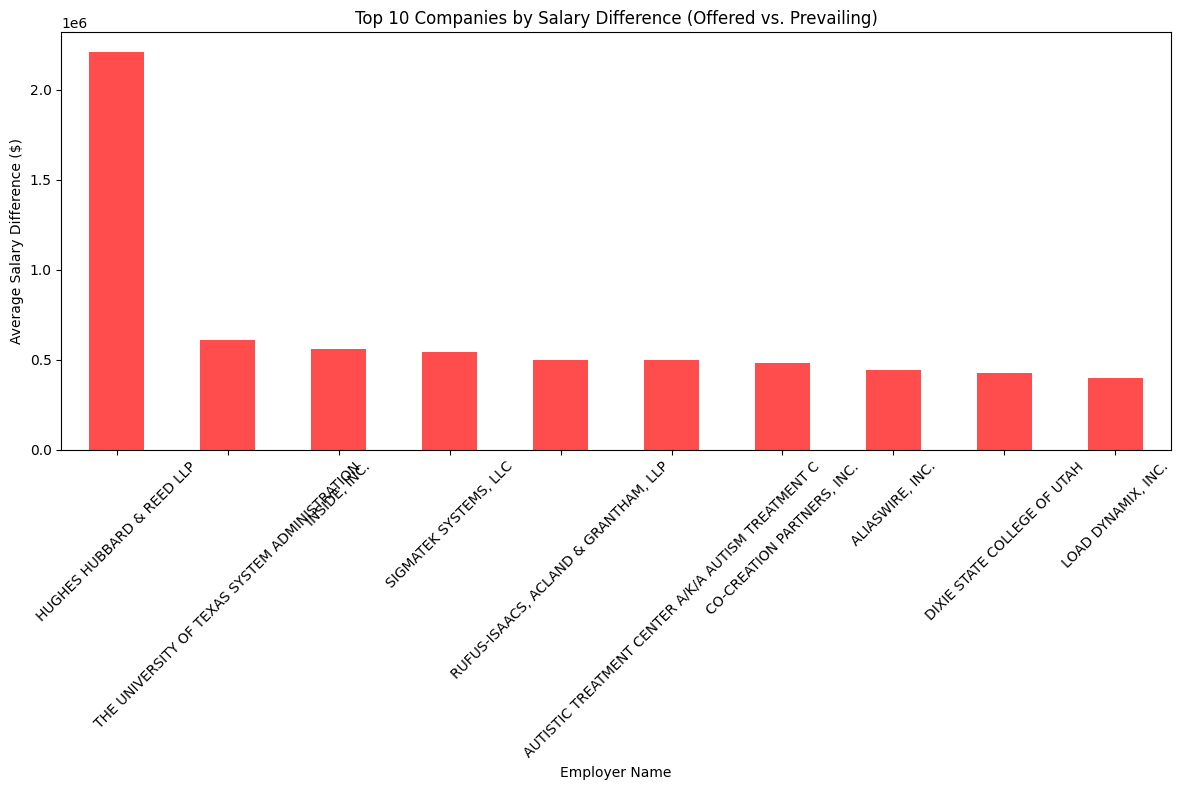

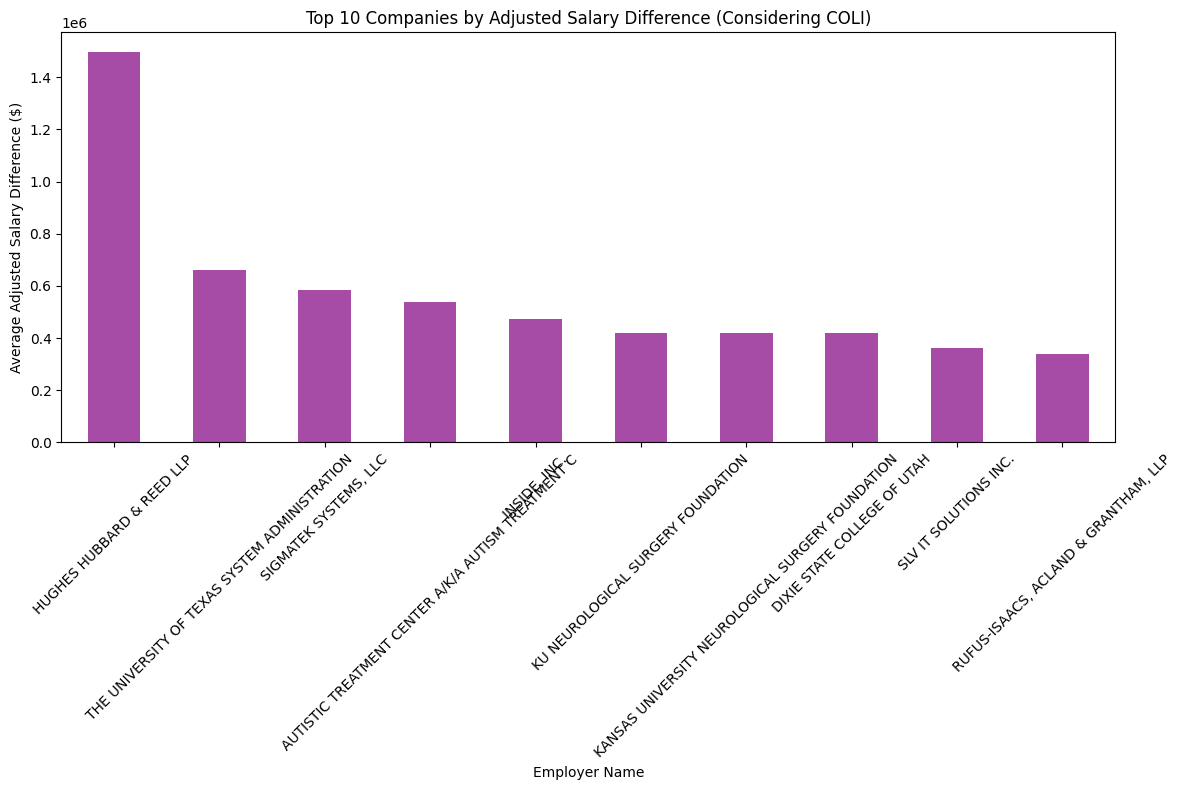

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the salary dataset
salary_file_path = '/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx'
salary_df = pd.read_excel(salary_file_path)

# Load Cost of Living Index (COLI) data
coli_data = pd.DataFrame({
    'WORK_STATE': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 
                   'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 
                   'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
                   'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 
                   'WV', 'WI', 'WY'],
    'COL_INDEX': [88.8, 124.4, 107.2, 90.3, 134.5, 105.5, 113.1, 102.6, 148.7, 102.3, 
                  91, 179, 106.1, 90.8, 91.5, 89.7, 87.7, 93.8, 92, 111.5, 119.5, 
                  148.4, 92.7, 94.1, 85.3, 88.4, 103.7, 90.1, 101.3, 115, 114.1, 
                  94.2, 125.1, 96.1, 94.6, 94, 86, 115.1, 99, 110.5, 96.5, 93.8, 
                  90.4, 93, 101.5, 114.9, 103.1, 115.1, 90.3, 95, 92.8]
})

# Merge COLI data into the salary DataFrame
salary_df = salary_df.merge(coli_data, how='left', left_on='WORK_STATE_ABBREVIATION', right_on='WORK_STATE')

# Ensure PAID_WAGE_PER_YEAR and PREVAILING_WAGE_PER_YEAR are numeric
salary_df['PAID_WAGE_PER_YEAR'] = pd.to_numeric(
    salary_df['PAID_WAGE_PER_YEAR'].replace('[^0-9.]', '', regex=True), errors='coerce'
)
salary_df['PREVAILING_WAGE_PER_YEAR'] = pd.to_numeric(
    salary_df['PREVAILING_WAGE_PER_YEAR'].replace('[^0-9.]', '', regex=True), errors='coerce'
)

# Calculate Adjusted Salary
salary_df['ADJUSTED_SALARY'] = salary_df['PAID_WAGE_PER_YEAR'] / (salary_df['COL_INDEX'] / 100)

# Calculate Salary Difference (Offered vs. Prevailing Wage)
salary_df['SALARY_DIFFERENCE'] = salary_df['PAID_WAGE_PER_YEAR'] - salary_df['PREVAILING_WAGE_PER_YEAR']
salary_df['ADJUSTED_DIFFERENCE'] = salary_df['ADJUSTED_SALARY'] - salary_df['PREVAILING_WAGE_PER_YEAR']

# 3a - Average salary difference by job sub-category
avg_diff_by_job = salary_df.groupby('JOB_TITLE_SUBGROUP')['SALARY_DIFFERENCE'].mean().sort_values(ascending=False)
avg_adj_diff_by_job = salary_df.groupby('JOB_TITLE_SUBGROUP')['ADJUSTED_DIFFERENCE'].mean().sort_values(ascending=False)

# Visualization: Average Salary Difference by Job Subcategory
plt.figure(figsize=(12, 8))
avg_diff_by_job.head(10).plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 10 Job Subcategories by Salary Difference (Offered vs. Prevailing)")
plt.xlabel("Job Subcategory")
plt.ylabel("Average Salary Difference ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Adjusted Salary Difference by Job Subcategory (COLI)
plt.figure(figsize=(12, 8))
avg_adj_diff_by_job.head(10).plot(kind='bar', color='green', alpha=0.7)
plt.title("Top 10 Job Subcategories by Adjusted Salary Difference (Considering COLI)")
plt.xlabel("Job Subcategory")
plt.ylabel("Average Adjusted Salary Difference ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3b - Average salary difference by employer
avg_diff_by_employer = salary_df.groupby('EMPLOYER_NAME')['SALARY_DIFFERENCE'].mean().sort_values(ascending=False)
avg_adj_diff_by_employer = salary_df.groupby('EMPLOYER_NAME')['ADJUSTED_DIFFERENCE'].mean().sort_values(ascending=False)

# Visualization: Top Companies by Salary Difference
plt.figure(figsize=(12, 8))
avg_diff_by_employer.head(10).plot(kind='bar', color='red', alpha=0.7)
plt.title("Top 10 Companies by Salary Difference (Offered vs. Prevailing)")
plt.xlabel("Employer Name")
plt.ylabel("Average Salary Difference ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Top Companies by Adjusted Salary Difference (COLI)
plt.figure(figsize=(12, 8))
avg_adj_diff_by_employer.head(10).plot(kind='bar', color='purple', alpha=0.7)
plt.title("Top 10 Companies by Adjusted Salary Difference (Considering COLI)")
plt.xlabel("Employer Name")
plt.ylabel("Average Adjusted Salary Difference ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
 import pandas as pd

# Load the salary dataset
salary_file_path = '/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx'  # Replace with your actual file path
salary_df = pd.read_excel(salary_file_path)

# Load Cost of Living Index (COLI) data
coli_data = pd.DataFrame({
        'WORK_STATE': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 
                       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 
                       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
                       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 
                       'WV', 'WI', 'WY'],

    'COL_INDEX': [88.8, 124.4, 107.2, 90.3, 134.5, 105.5, 113.1, 102.6, 148.7, 102.3, 
                            91, 179, 106.1, 90.8, 91.5, 89.7, 87.7, 93.8, 92, 111.5, 119.5, 
                            148.4, 92.7, 94.1, 85.3, 88.4, 103.7, 90.1, 101.3, 115, 114.1, 
                            94.2, 125.1, 96.1, 94.6, 94, 86, 115.1, 99, 110.5, 96.5, 93.8, 
                            90.4, 93, 101.5, 114.9, 103.1, 115.1, 90.3, 95, 92.8]  # Example cost-of-living indices
})

# Merge COLI data into the salary DataFrame
salary_df = salary_df.merge(coli_data, how='left', left_on='WORK_STATE_ABBREVIATION', right_on='WORK_STATE')

# Ensure consistency in state columns
salary_df['WORK_STATE_ABBREVIATION'] = salary_df['WORK_STATE_ABBREVIATION'].str.upper()

# Ensure PAID_WAGE_PER_YEAR and PREVAILING_WAGE_PER_YEAR are numeric
salary_df['PAID_WAGE_PER_YEAR'] = pd.to_numeric(
    salary_df['PAID_WAGE_PER_YEAR'].replace('[^0-9.]', '', regex=True), errors='coerce'
)
salary_df['PREVAILING_WAGE_PER_YEAR'] = pd.to_numeric(
    salary_df['PREVAILING_WAGE_PER_YEAR'].replace('[^0-9.]', '', regex=True), errors='coerce'
)

# Calculate Adjusted Salary
salary_df['ADJUSTED_SALARY'] = salary_df['PAID_WAGE_PER_YEAR'] / (salary_df['COL_INDEX'] / 100)

# Calculate Salary Difference (Offered vs. Prevailing Wage)
salary_df['SALARY_DIFFERENCE'] = salary_df['PAID_WAGE_PER_YEAR'] - salary_df['PREVAILING_WAGE_PER_YEAR']
salary_df['ADJUSTED_DIFFERENCE'] = salary_df['ADJUSTED_SALARY'] - salary_df['PREVAILING_WAGE_PER_YEAR']

# 3a - Are there job subcategories that tend to get over- or under-paid?

# Average salary difference by job sub-category
avg_diff_by_job = salary_df.groupby('JOB_TITLE_SUBGROUP')['SALARY_DIFFERENCE'].mean().sort_values(ascending=False)
print("\nAverage Salary Difference by Job Subcategory (Offered vs. Prevailing):")
print(avg_diff_by_job)

# Average adjusted salary difference by job sub-category (considering COLI)
avg_adj_diff_by_job = salary_df.groupby('JOB_TITLE_SUBGROUP')['ADJUSTED_DIFFERENCE'].mean().sort_values(ascending=False)
print("\nAverage Adjusted Salary Difference by Job Subcategory (Considering COLI):")
print(avg_adj_diff_by_job)

# 3b - Are there companies that tend to over- or under-pay?

# Average salary difference by employer
avg_diff_by_employer = salary_df.groupby('EMPLOYER_NAME')['SALARY_DIFFERENCE'].mean().sort_values(ascending=False)
print("\nTop Companies That Overpay (Based on Offered vs. Prevailing):")
print(avg_diff_by_employer.head(10))

print("\nTop Companies That Underpay (Based on Offered vs. Prevailing):")
print(avg_diff_by_employer.tail(10))

# Average adjusted salary difference by employer (considering COLI)
avg_adj_diff_by_employer = salary_df.groupby('EMPLOYER_NAME')['ADJUSTED_DIFFERENCE'].mean().sort_values(ascending=False)
print("\nTop Companies That Overpay (Considering COLI):")
print(avg_adj_diff_by_employer.head(10))

print("\nTop Companies That Underpay (Considering COLI):")
print(avg_adj_diff_by_employer.tail(10))


Average Salary Difference by Job Subcategory (Offered vs. Prevailing):
JOB_TITLE_SUBGROUP
attorney                 39765.222440
assistant professor      36023.267670
management consultant    30690.232575
data scientist           17475.458541
software engineer         8437.820495
data analyst              7277.123899
business analyst          6550.793794
teacher                   3627.142282
Name: SALARY_DIFFERENCE, dtype: float64

Average Adjusted Salary Difference by Job Subcategory (Considering COLI):
JOB_TITLE_SUBGROUP
assistant professor      34625.211022
management consultant    21607.291491
attorney                 13856.294097
data analyst              1399.072406
teacher                   1185.283649
business analyst           895.164667
data scientist           -3957.685169
software engineer        -4689.232915
Name: ADJUSTED_DIFFERENCE, dtype: float64

Top Companies That Overpay (Based on Offered vs. Prevailing):
EMPLOYER_NAME
HUGHES HUBBARD & REED LLP                       

The analysis shows that data-related jobs differ significantly in salaries across subcategories, locations, and employers, with key differences when considering cost-of-living adjustments. Data scientists and software engineers had the highest average salaries, at $108,021 and $92,505, respectively, followed by business analysts at $71,300 and data analysts at $70,030. However, when controlled for COLI, subcategories such as assistant professors ($34,734 adjusted difference), and management consultants ($23,134) have the highest relative pay, while software engineers (-$2,797) and data scientists (-$750) have negative differences, indicating that location is a major factor in salary consideration.
On the state level, California has the top average salaries for data scientists ($117,824) and software engineers ($108,558), followed by New York and Texas. However, Texas is a more positive option post-COLI adjustments with respect to its lower living cost, therefore offering competitive effective pay. Data and business analysts also have a wide variance across states; California pays $80,470 for data analysts and $76,568 for business analysts.
Top employers further set salary opportunities apart. For business analysts, the highest recorded salary was provided by The University of Texas System Administration at $677,508, while data analysts had Intuit at $433,161. Among data scientists, Netflix was an outlier at $220,000 annually.
At last, attorneys and assistant professors exhibit the biggest positive deviations from the current wages, while data analysts and business analysts stay modestly above benchmark. It is also worth mentioning that most salaries are concentrated below $150,000, with the biggest concentration of experience requirements peaking at 60 months.